# 미디엄(Medium)에서 좋은 아티클을 쓰기 위해서 어떤 요소을 고려하면 좋을까요?

## 배경
- 미디엄은 누구나 콘텐츠를 즐기고, 자유롭게 발행할 수 있는 온라인 콘텐츠 출판 플랫폼이다. 미디엄에서 콘텐츠를 출판하는 유저 입장에서, 어떤 요소를 고려했을 때 독자들의 관심과 반응을 많이 이끌어낼 수 있으며 독자들이 좋은 아티클을 작성하는 데 도움이 되는지에 대해서 분석하고자 한다. 

- 이러한 분석에 앞서서, 미디엄에서 아티클의 대표적인 반응지표 중 하나가 박수(clap) 수이고, 또한 박수 수가 높다는 것은 독자들이 좋아한 글이라는 증거가 될 수 있기 때문에 박수 수를 기준으로 미디엄의 다양한 분야의 아티클을 다루고 있는 데이터('[Medium articles dataset for 2020](https://www.kaggle.com/datasets/shlokramteke/sdfadgdadfda)')로 선별하였다. 해당 데이터셋을 기반으로 아래와 같은 가설들을 세워 보았다. 

## 가설 설정
- 1) 퍼블리케이션(Publication)별 많이 사용되는 단어가 제목(Title)에 포함되어 있으면 박수 수를 많이 받는데 긍정적인 영향을 준다. 
- 2) 부제목(Subtitle)까지 작성되어 있으면 박수 수를 많이 받는데 긍정적인 영향을 준다.
- 3) 박수 수를 많이 받는데 긍정적인 영향을 줄 수 있는 적정 리딩 타임(Reading Time)이 존재한다.

## 가설 검증 결과
- 1) 퍼블리케이션별 많이 사용되는 단어가 제목에 포함되는 것은 박수 수를 받는데 크게 영향이 없다.
- 2) 부제목까지 작성되어 있으면 박수 수를 받는데 도움이 된다.
- 3) 박수 수를 많이 받는 아티클의 대부분은 평균적으로 5~8분 사이의 리딩타임으로 분포되어 있다. 

## 인사이트
- 위 내용과 같이, 이미 발행된 아티클 중 박수 수를 많이 받은 아티클의 특성을 분석해 보았다. 분석결과에 따르면 아티클 제목에 해당 분야에 많이 사용되는 단어를 일부러 포함시키는 것보다, 주제와 밀접하고 직관적인 부제목을 설정함에 따라 노출도가 높아져 박수를 많이 받는데 도움이 된다. 또한 글이 너무 길면 사람들이 읽다가 이탈할 확률이 높을 수 있고, 반대로 너무 짧으면 인사이트를 주기에 충분하지 않을 수 있으니 적절하게 5~8분 사이의 리딩 타임으로 작성하는것이 독자에게 도움이 된다.

## 한계점
- 해당 데이셋은 2020년 미디엄에서 발행된 총 5개의 퍼블리케이션별의 아티클에 대한 데이터여서 분석결과를 도출하는데 모수가 적어서 정확한 분석결과를 기대하기가 쉽지 않았다. 따라서, 좀 더 다양한 퍼블러케이션별의 아티클에 대한 데이터를 확보해서 분석한다면 좀 더 정확한 분석결과가 나오지 않을까 생각된다. 
- Better Humans별의 아티클은 전체적으로 리딩 타임이 다른 퍼블리케이션보다 긴 편인데, 하지만 현재 데이터셋상 전체 아티클에서 비중이 4%밖에 되지 않으므로 이러한 분석결과가 조금 편파적일 수 있다. 만약 해당 분야의 아티클 데이터를 충분히 확보해서 분석했는데도 이러한 결과가 나온다면, 필요에 따라서 해당 분야의 아타클을 별도로 집중적으로 분석할 필요가 있다고 생각된다.

### 데이터 분석을 위한 환경 구축

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
plt.style.use('bmh')
import pandasql as ps
from wordcloud import WordCloud, STOPWORDS

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/sdfadgdadfda/medium_data.csv


### 데이터셋 불러오기 및 기본적인 탐색 진행

In [2]:
# 데이터셋 불러오기
original_data = pd.read_csv('/kaggle/input/sdfadgdadfda/medium_data.csv')
data = original_data.copy()

# 데이터셋 정보 확인
data.info()  # (11642, 9)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11642 entries, 0 to 11641
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            11642 non-null  int64 
 1   url           11642 non-null  object
 2   title         11642 non-null  object
 3   subtitle      6486 non-null   object
 4   claps         11642 non-null  int64 
 5   responses     11642 non-null  int64 
 6   reading_time  11642 non-null  int64 
 7   publication   11642 non-null  object
 8   date          11642 non-null  object
dtypes: int64(4), object(5)
memory usage: 818.7+ KB


In [3]:
# 데이터셋 일부 데이터 보기
data.head()

,id,url,title,subtitle,claps,responses,reading_time,publication,date
0,1,https://medium.datadriveninvestor.com/is-fasta...,Is FastAPI going to replace Django?,NaN,226,4,4,Data Driven Investor,2020-05-24
1,2,https://medium.datadriveninvestor.com/whats-th...,What’s the Best Way to Buy a Reliable Luxury Car?,The full cost of ownership makes buying brand-...,186,3,10,Data Driven Investor,2020-05-24
2,3,https://medium.datadriveninvestor.com/credit-r...,Credit Risk Assessment,NaN,76,0,7,Data Driven Investor,2020-05-24
3,4,https://medium.datadriveninvestor.com/cash-is-...,Cash is Trash or Cash is King? What´s it gonna...,NaN,139,0,6,Data Driven Investor,2020-05-24
4,5,https://medium.datadriveninvestor.com/how-to-b...,How to be Flipin’ awesome for your fans,Flipboard magazines capitalize on marketing vi...,34,0,5,Data Driven Investor,2020-05-24


In [4]:
# 숫자형 변수에 대한 통계량 보기
data.describe()

,id,claps,responses,reading_time
count,11642.000000,11642.000000,11642.000000,11642.000000
mean,5821.500000,352.974661,2.259835,6.493815
std,3360.900251,1047.078629,8.716502,3.390032
min,1.000000,0.000000,0.000000,0.000000
25%,2911.250000,65.000000,0.000000,4.000000
50%,5821.500000,113.000000,0.000000,6.000000
75%,8731.750000,244.000000,1.000000,8.000000
max,11642.000000,27000.000000,231.000000,47.000000


In [5]:
# 각 퍼블리케이션별 비중 확인
round(data['publication'].value_counts(normalize=True), 2)  

The Startup             0.55
Data Driven Investor    0.20
UX Collective           0.13
Better Marketing        0.08
Better Humans           0.04
Name: publication, dtype: float64

In [6]:
# 결측치 확인 -> 부제목 칼럼만 결측치(약 44%) 있음 
data.isnull().sum() / data.shape[0]

id              0.000000
url             0.000000
title           0.000000
subtitle        0.442879
claps           0.000000
responses       0.000000
reading_time    0.000000
publication     0.000000
date            0.000000
dtype: float64

In [7]:
# 중복된 값 확인 -> 중복된 값 없음
data[data.duplicated()]

,id,url,title,subtitle,claps,responses,reading_time,publication,date


위와 같은 기본적인 데이터 탐색 결과에 따르면, 
1. 해당 데이터셋에 총 5개의 퍼블리케이션별의 아티클이 포함되어 있으며, 각각 The Startup(55%), Data Driven Investor(20%), UX Collective(13%), Better Marketing       (8%), Better Humans(4%)의 비중을 차지하고 있다.
2. 해당 데이터셋에 이상치, 중복된 값이 없으며, 결측치가 있지만 삭제 또는 대체할 필요가 없으니 따로 전처리를 진행하지 않았다.

이어서, 앞서 설정한 가설에 대해 검증하고자 한다.

### 가설 검증
1) 퍼블리케이션별 많이 사용되는 단어가 제목에 포함되어 있으면 박수 수를 많이 받는데 긍정적인 영향을 준다.
   - 아래의 WordCloud 1-1는 The Startup 퍼블리케이션 2020년 발행 아티클의 전체 제목에서 많이 쓰인 단어들이며, WordCloud 1-2는 박수 수가 많은 상위 100개 아티클의 제목에서 많이 쓰인 단어들이다.
   - The Startup에서 발행된 아티클의 제목에는 using, python, data, javascript, writing, code과 같은 개발 언어와 관련된 글이 많이 쓰였으나, 박수 수가 많은 상위 100개 아티클의 제목에는 things, writer, brain, life, better, top와 같은 비즈니스적인 내용들이 많이 쓰였다.

Text(0.5, 1.0, 'WordCloud 1-1')

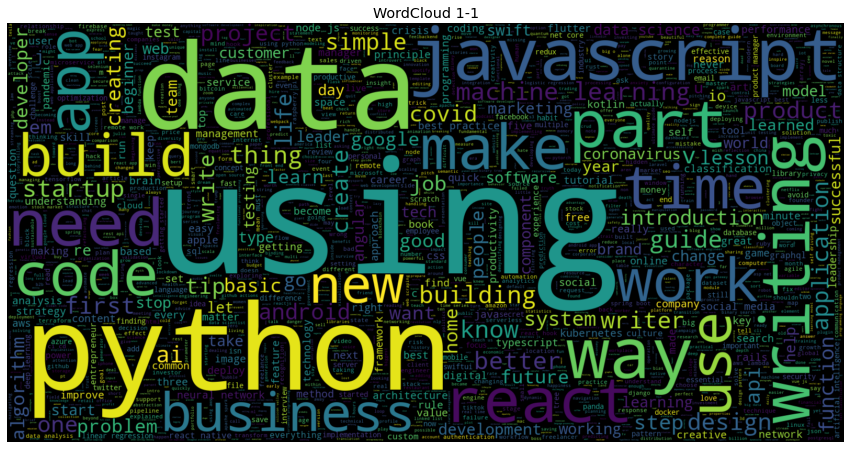

In [8]:
the_startup_data = data[data['publication'] == 'The Startup']
startup_all_title = " ".join(the_startup_data['title'].str.lower())

stop_words = ["markup", "class", "strong", "h3", "s", "don", "t", "without", "will"] + list(STOPWORDS)
plt.figure(figsize=(15,15))
startup_all_title_wordcloud = WordCloud(background_color = "black", stopwords=stop_words, max_words=2000,
                      max_font_size=300, width=1600, height=800).generate(startup_all_title)

plt.imshow(startup_all_title_wordcloud.recolor(colormap='viridis', random_state=17), interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud 1-1')

Text(0.5, 1.0, 'WordCloud 1-2')

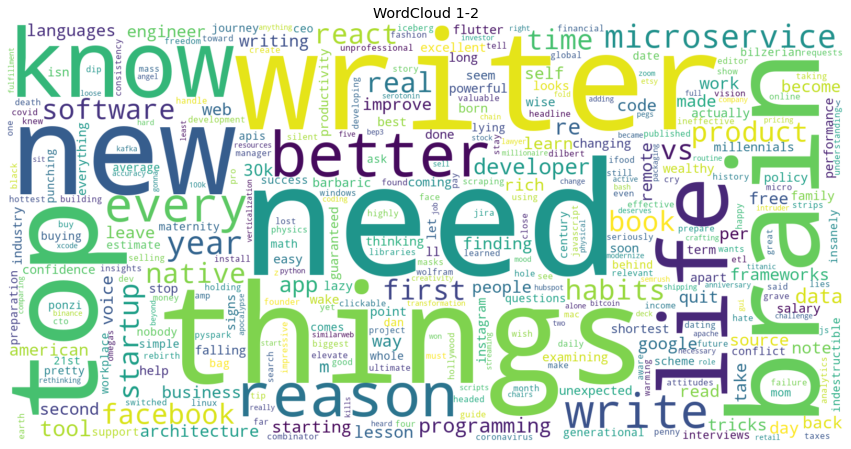

In [9]:
startup_top_100 = the_startup_data.sort_values(by='claps', ascending=False).head(100)
startup_top_100_title = " ".join(startup_top_100['title'].str.lower())

plt.figure(figsize=(15,15))
startup_top_100_title_wordcloud = WordCloud(background_color = "white", stopwords=stop_words, max_words=2000,
                      max_font_size=300, width=1600, height=800).generate(startup_top_100_title)

plt.imshow(startup_top_100_title_wordcloud.recolor(colormap='viridis', random_state=17), interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud 1-2')

   - 아래의 WordCloud 2-1는 Data Driven Investor 퍼블리케이션 2020년 발행 아티클의 전체 제목에서 많이 쓰인 단어들이며, WordCloud 2-2는 박수 수가 많은 상위 100개 아티클의 제목에서 많이 쓰인 단어들이다.
   - Data Driven Investor에서 발행된 아티클의 제목에는 data, ai, business, machine, learning, covid, bitcoin의 단어가 많이 쓰였으나, 박수 수가 많은 상위 100개 아티클의 제목에는 market, stock, money, audio, trump, data, bitcoin와 같은 단어가 많이 쓰였다. 비교해 보니 data, bitcoin 말고는 공통 단어를 찾기 힘들다.

Text(0.5, 1.0, 'WordCloud 2-1')

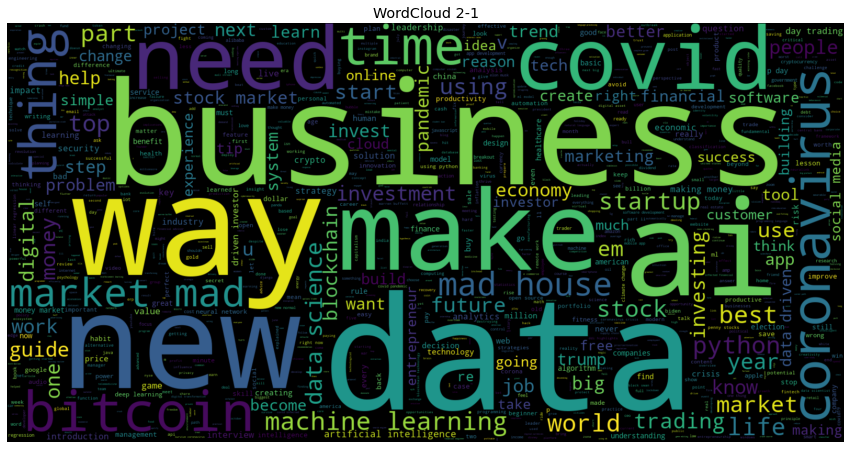

In [10]:
data_driven_investor = data[data['publication'] == 'Data Driven Investor']
data_driven_investor_all_title = " ".join(data_driven_investor['title'].str.lower())

plt.figure(figsize=(15,15))
data_driven_investor_all_title_wordcloud = WordCloud(background_color = "black", stopwords=stop_words, max_words=2000,
                      max_font_size=300, width=1600, height=800).generate(data_driven_investor_all_title)

plt.imshow(data_driven_investor_all_title_wordcloud.recolor(colormap='viridis', random_state=17), interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud 2-1')

Text(0.5, 1.0, 'WordCloud 2-2')

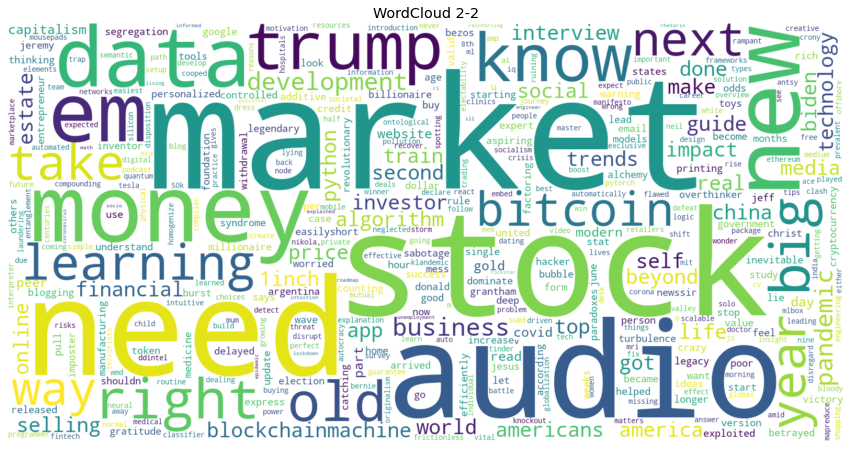

In [11]:
data_driven_investor_top_100 = data_driven_investor.sort_values(by='claps', ascending=False).head(100)
data_driven_investor_top_100_title = " ".join(data_driven_investor_top_100['title'].str.lower())

plt.figure(figsize=(15,15))
data_driven_investor_top_100_title_wordcloud = WordCloud(background_color = "white", stopwords=stop_words, max_words=2000,
                      max_font_size=300, width=1600, height=800).generate(data_driven_investor_top_100_title)

plt.imshow(data_driven_investor_top_100_title_wordcloud.recolor(colormap='viridis', random_state=17), interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud 2-2')

   - 아래의 WordCloud 3-1는 UX Collective 퍼블리케이션 2020년 발행 아티클의 전체 제목에서 많이 쓰인 단어들이며, WordCloud 3-2는 박수 수가 많은 상위 100개 아티클의 제목에서 많이 쓰인 단어들이다.
   - UX Collective에서 발행된 아티클의 제목에는 design, product, designer, UX, designing, user, research와 같은 디자인과 유저 리서치 관련 내용들이 많이 쓰였으나, 박수 수가 많은 상위 100개 아티클의 제목에는 design, product, designer, UX, manager, exercises, interface, layout와 같은 디자인 관련 단어 말고는 UI와 관련된 이야기가 많았던 것으로 보인다.

Text(0.5, 1.0, 'WordCloud 3-1')

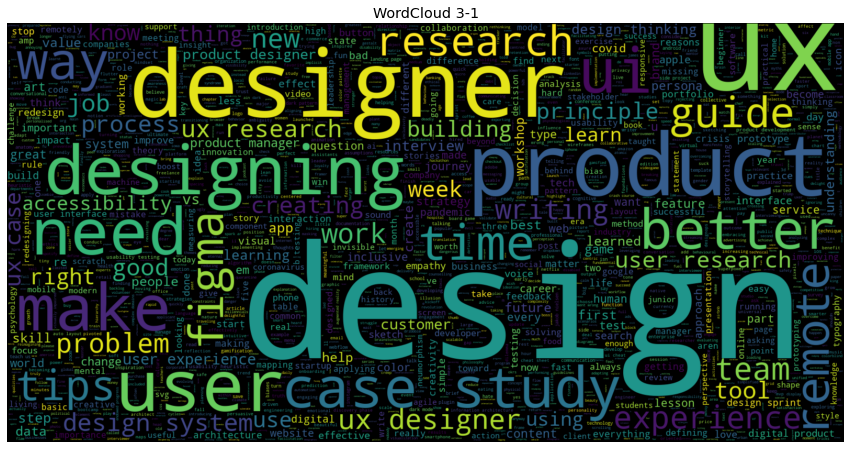

In [12]:
ux_collective_data = data[data['publication'] == 'UX Collective']
ux_collective_all_title = " ".join(ux_collective_data['title'].str.lower())

plt.figure(figsize=(15,15))
ux_collective_all_title_wordcloud = WordCloud(background_color = "black", stopwords=stop_words, max_words=2000,
                      max_font_size=300, width=1600, height=800).generate(ux_collective_all_title)

plt.imshow(ux_collective_all_title_wordcloud.recolor(colormap='viridis', random_state=17), interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud 3-1')

Text(0.5, 1.0, 'WordCloud 3-2')

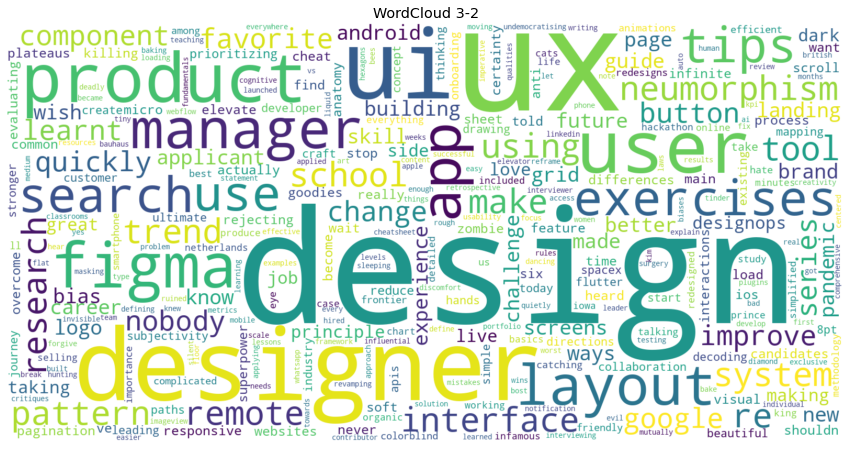

In [13]:
ux_collective_top_100 = ux_collective_data.sort_values(by='claps', ascending=False).head(100)
ux_collective_top_100_title = " ".join(ux_collective_top_100['title'].str.lower())

plt.figure(figsize=(15,15))
ux_collective_top_100_title_wordcloud = WordCloud(background_color = "white", stopwords=stop_words, max_words=2000,
                      max_font_size=300, width=1600, height=800).generate(ux_collective_top_100_title)

plt.imshow(ux_collective_top_100_title_wordcloud.recolor(colormap='viridis', random_state=17), interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud 3-2')

위와 같이 The Startup, Data Driven Investor, UX Collective 이렇게 3개의 퍼블리케이션 아티클 대상으로 가설1를 검증한 결과로는 퍼블리케이션별 많이 사용되는 단어가 제목에 포함되는 것은 박수 수를 받는데 크게 영향을 주지 않는다고 볼 수 있다. 이 외의 나머지 퍼블리케이션에 대해서는 현재 데이터상 차지하는 비중이 크지 않기 때문에 추가로 분석을 하지 않았다.

2) 부제목까지 작성되어 있으면 박수 수를 많이 받는데 긍정적인 영향을 준다.
   - 아래는 전체 데이터셋을 대상으로 퍼블리케이션과 상관없이 박수 수가 많은 상위 100개 아티클을 추출하여, 상위 100개의 아티클 중 81개가 부제목이 달린 것을 확인할 수 있다. 
   - 또한, 각 퍼블리케이션별 박수 수가 많은 상위 100개의 아티클을 추출하여, 부제목이 각각 몇개가 달려 있는지 SQL 쿼리문으로 확인해 보았다. 확인한 결과, Data Driven Investor 퍼블리케이션 빼고 나머지 4개의 퍼블리케이션 아티클 100개 중 최소 70개가 부제목이 있는 것을 알 수 있다.

In [14]:
data_top_100 = data.sort_values(by = 'claps', ascending=False).head(100)

top_100_tile_subtitle_count = """select count(title) as "Count of title", count(subtitle) as "Count of subtitle"
from data_top_100
"""

top_100_tile_subtitle_count_result = ps.sqldf(top_100_tile_subtitle_count, locals())
top_100_tile_subtitle_count_result

,Count of title,Count of subtitle
0,100,81


In [15]:
per_publication_tile_subtitle_count = """select publication, count(title) as "Count of title", count(subtitle) as "Count of subtitle"
from (select publication, title, subtitle, row_number() over(partition by publication order by claps desc) rank from data) as a
where rank <= 100
group by publication
"""
per_publication_tile_subtitle_count_result = ps.sqldf(per_publication_tile_subtitle_count, locals())
per_publication_tile_subtitle_count_result

,publication,Count of title,Count of subtitle
0,Better Humans,100,88
1,Better Marketing,100,90
2,Data Driven Investor,100,48
3,The Startup,100,70
4,UX Collective,100,75


따라서 전반적으로 보았을 때, 가설2에 대한 검증결과로는 부제목까지 작성되어 있으면 박수 수를 받는데 도움이 된다고 할 수 있다.

3) 박수 수를 많이 받는데 긍정적인 영향을 줄 수 있는 적정 리딩 타임이 존재한다.
   - 아래는 전체 데이터셋을 대상으로 퍼블리케이션별 박수 수가 많은 상위 100개의 아티클을 추출하여, 퍼블리케이션별 소요될 예상 리딩 타임의 평균값을 SQL 쿼리문으로 구해 보았다.  
   - 쿼리문으로 확인한 결과, Better Humans 퍼블리케이션 빼고 나머지 4개의 퍼블리케이션별 박수 수가 많은 상위 100개 아티클의 평균 리딩 타임은 5~8분 사이에 분포되어 있다는 것을 확인할 수 있다. 

In [16]:
query = """select publication, AVG(reading_time)
from (select publication, reading_time, row_number() over(partition by publication order by claps desc) rank from data) as a
where rank <= 100
group by publication
"""

query_result = ps.sqldf(query, locals())
query_result

,publication,AVG(reading_time)
0,Better Humans,14.29
1,Better Marketing,5.97
2,Data Driven Investor,6.59
3,The Startup,7.01
4,UX Collective,7.75


Better Humans의 리딩타임값이 다른 퍼블리케이션보다 크게 나타나서, 리딩 타임에 대한 전반적인 통계량을 아래와 같이 확인했다. 확인한 결과는 해당 분야의 아티클의 최소리딩타임이 7분이며, 최대는 31분, 리딩타임의 중앙값과 최빈값은 각각 11.5분과 11분이다.

In [17]:
better_humans_data = data[data['publication']=='Better Humans']
better_humans_data_top_100 = better_humans_data.sort_values(by = 'claps', ascending=False).head(100)
better_humans_data_top_100['reading_time'].describe()

count    100.00000
mean      14.29000
std        5.34902
min        7.00000
25%       11.00000
50%       11.50000
75%       17.00000
max       31.00000
Name: reading_time, dtype: float64

In [18]:
better_humans_data_top_100['reading_time'].mode()

0    11
dtype: int64